# Predicting Credit Worthiness of Borrower

The world has been on its heels ever since the financial crisis and is still recovering from those shockwaves. Flawed systems enabled irresponsible lending and practices. As a result, consumers have had a tougher time living the life they once had pre-financial crisis. Consumers with lower FICO scores were able to borrow easily in the past are no longer able to due to heavier scrutinization. With that said, there are other factors at play that determine credit worthiness and hopefully the explosion of data science and machine learning will help unlock a much more holistic view.

The goal of this project is to display the use of a few machine learning models to predict whether or not a borrower paid back their loan in full. We will use lending data from 2007-2010 from Lending Club. The data is publicly available data from [LendingClub.com](https://www.lendingclub.com/info/download-data.action). 

A quick look at what the columns in the dataset represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

## Get the Data

In [3]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization to learn a little more about the data and see if things make sense. We'll use seaborn and pandas built-in plotting capabilities.

In [94]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

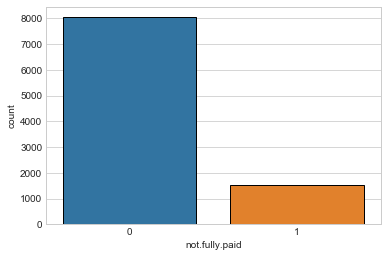

In [95]:
sns.countplot(x='not.fully.paid',data=loans)

We have an imbalanced class issue here. There are way more samples of fully paid borrowers versus not fully paid borrowers. This could be an issue when we make our prediction. For now it's good to realize this.

** Create an overlapping histogram of FICO distributions, one for each credit.policy outcome.**

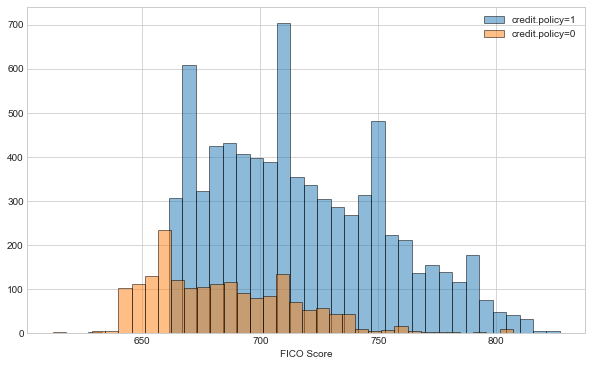

In [18]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35,alpha=0.5,label='credit.policy=1')
loans[loans['credit.policy']==0]['fico'].hist(bins=35,alpha=0.5,label='credit.policy=0')
plt.xlabel('FICO Score')
plt.legend()

As expected, consumers with higher FICO scores tend to meet the credit underwriting criteria.

** Create a similar figure, except this time select by the not.fully.paid column.**

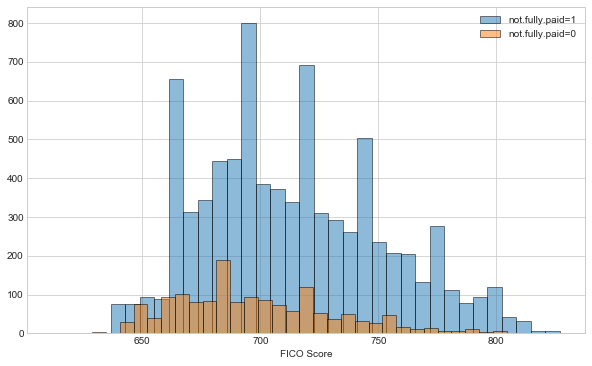

In [17]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,alpha=0.5,label='not.fully.paid=1')
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,alpha=0.5,label='not.fully.paid=0')
plt.xlabel('FICO Score')
plt.legend()

Although there is an imbalanced representation of classes here, there is little difference between the distribution of FICO scores of those that have fully paid their balances and those that have not.

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

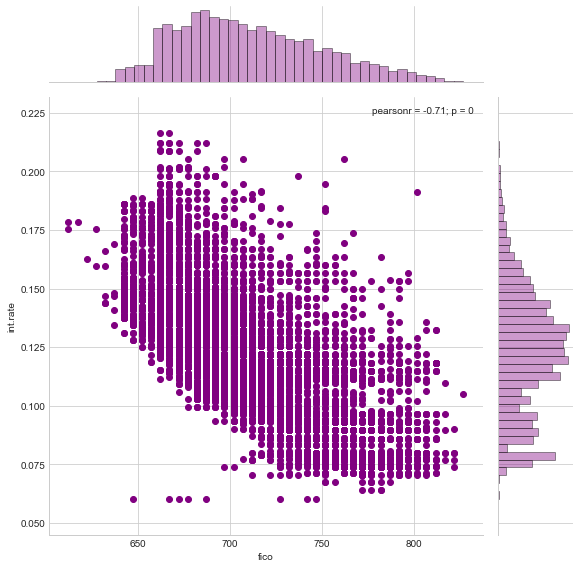

In [14]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple',size=8)

This makes sense since lower FICO scores tend to be correlated with higher interest rates and vice versa.

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. **

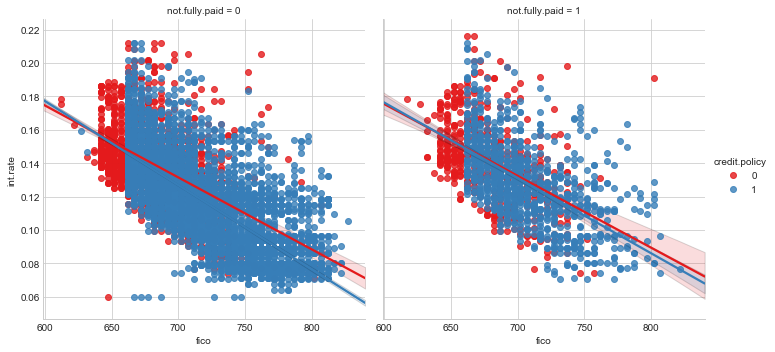

In [16]:
sns.lmplot(x='fico',y='int.rate',data=loans,col='not.fully.paid',hue='credit.policy',palette='Set1')

The trend of FICO score and interest rate is similar as we expect for those that fully paid balances versus those that did not.

# Setting up the Data

**Check loans.info() again.**

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [20]:
cat_feats = ['purpose']

**Now we use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [21]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [22]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a test set! We'll do a 70/30 split and use a random state for reproducibility.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [76]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Logistic Regression Model
Our very first model will be a logistic regression as it's great at predicting binary outcomes.

In [78]:
# import Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [79]:
log_model = LogisticRegression()

In [80]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
log_predictions = log_model.predict(X_test)

## Training a Decision Tree Model

Another great model is the decision tree because it's simple, easy to understand and can be visualized. It also implicitly performs feature selection.

In [82]:
# import decision tree model
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtree = DecisionTreeClassifier(random_state=101)

In [84]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [85]:
dtree_predictions = dtree.predict(X_test)

## Training a Random Forest Model

An ensemble model (collection of decision trees) that is very robust in nature.

In [86]:
# import random forest model
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier(n_estimators=1000,random_state=101)

In [88]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [89]:
rfc_predictions = rfc.predict(X_test)

## Evaluation Models
**Create a classification report and a confusion matrix for each model.**

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

**Logistic Model results:**

In [91]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,log_predictions))
print('\n')
print('Classification Report:')
print(classification_report(y_test,log_predictions))

Confusion Matrix:
[[2425    6]
 [ 434    9]]


Classification Report:
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.60      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



The logistic regression predicted very well for the fully paid class, but terribly on the not fully paid class.

**Decision Tree Model results:**

In [92]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,dtree_predictions))
print('\n')
print('Classification Report:')
print(classification_report(y_test,dtree_predictions))

Confusion Matrix:
[[1976  455]
 [ 336  107]]


Classification Report:
             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2431
          1       0.19      0.24      0.21       443

avg / total       0.75      0.72      0.74      2874



The decision tree predicted decently on the fully paid class, but bad on the not fully paid class. However, it's an improvement from the logistic regression.

**Random Forest Model results:**

In [93]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,rfc_predictions))
print('\n')
print('Classification Report:')
print(classification_report(y_test,rfc_predictions))

Confusion Matrix:
[[2420   11]
 [ 431   12]]


Classification Report:
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.52      0.03      0.05       443

avg / total       0.80      0.85      0.78      2874



The random forest model is very similar to the logistic regression. Great performance on the fully paid class, but terrible on the not fully paid class.

On average, the logistic regression and random forest are better performers, but the decision tree is better when predictive accuracy matters for both classes.

## Conclusion

**Models:**  
On average, the random forest and logistic regression models are better. However, their performance for the not fully paid class is very bad. So it comes down to the goal of the business problem. Do we care about maximizing both classes, or one more than the other. In the credit underwriting business, I would say that maximizing both is critical. You don't want to consider everyone credit worthy and give out loans like candy and risk large volume of defaults. You also don't want to consider everyone unworthy or everyone will be rejected and walk away an unhappy customer. None of these models would be chosen for production, but at the moment, the decision tree is the best bet for maximizing predictive accuracy in both classes.

**Future work:**  
Due to the imbalance of classes in the response variable, it may be critical to resample the response variable to balance the classes which could vastly improve the models. Some other things to consider to improve class '1' predictions are to perform further feature engineering or variable selection and/or try other models like neural networks. Also, performing hyperparameter tuning for each of the models using a k-fold cross validation approach could squeeze out some more performance from the models. 